In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
base = pd.read_csv('base_etablissement_par_tranche_effectif.csv')

# About this file
# CODGEO : geographique code for the town (can be joined with codeinsee column from "namegeographic_information.csv')
# LIBGEO : name of the town (in french)
# REG : region number
# DEP : depatment number
# E14TST : total number of firms in the town
# E14TS0ND : number of unknown or null size firms in the town
# E14TS1 : number of firms with 1 to 5 employees in the town
# E14TS6 : number of firms with 6 to 9 employees in the town
# E14TS10 : number of firms with 10 to 19 employees in the town
# E14TS20 : number of firms with 20 to 49 employees in the town
# E14TS50 : number of firms with 50 to 99 employees in the town
# E14TS100 : number of firms with 100 to 199 employees in the town
# E14TS200 : number of firms with 200 to 499 employees in the town
# E14TS500 : number of firms with more than 500 employees in the town

base = base[base["CODGEO"].apply(lambda x: str(x).isdigit())]

base["CODGEO"] = base["CODGEO"].astype(int)

base

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,1001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,1002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,1004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,1005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,1006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36676,97613,M'Tsangamouji,6,976,169,169,0,0,0,0,0,0,0,0
36677,97614,Ouangani,6,976,230,230,0,0,0,0,0,0,0,0
36678,97615,Pamandzi,6,976,569,569,0,0,0,0,0,0,0,0
36679,97616,Sada,6,976,345,345,0,0,0,0,0,0,0,0


In [183]:
name = pd.read_csv('/home/mykoa/Projects/ParisSaclay/French_salaries/name_geographic_information.csv')

renaming = {'nom_région': 'region_name',
              'chef.lieu_région': 'region_capital',
              'nom_commune': 'common_name',
              'codes_postaux': 'postcodes',
               'code_région': 'region_code',
               'numéro_département': 'department_number',
               'nom_département':'department_name',
               'préfecture': 'perfecture',
               'numéro_circonscription':'constituency_number',
               'éloignement':'remoteness'
           }

name.rename(columns=renaming, inplace=True)

name.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

name["longitude"] = name["longitude"].apply(lambda x: str(x).replace(',','.'))

mask = name["longitude"] == '-'
name.drop(name[mask].index, inplace=True)

name.dropna(subset = ["longitude", "latitude"], inplace=True)

name["longitude"] = name["longitude"].astype(float)

paris_lat = name.loc[name["common_name"] == "Paris"].iloc[0]["latitude"]
paris_lon = name.loc[name["common_name"] == "Paris"].iloc[0]["longitude"]

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

distances = []

for index, row in name.iterrows():
    distances.append(haversine(row["longitude"], row["latitude"], paris_lon, paris_lat))

name["distance"] = pd.Series(distances, index=name.index)

print(name.columns)
name

Index(['EU_circo', 'region_code', 'region_name', 'region_capital',
       'department_number', 'department_name', 'perfecture',
       'constituency_number', 'common_name', 'postcodes', 'code_insee',
       'latitude', 'longitude', 'remoteness', 'distance'],
      dtype='object')


,EU_circo,region_code,region_name,region_capital,department_number,department_name,perfecture,constituency_number,common_name,postcodes,code_insee,latitude,longitude,remoteness,distance
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21,357.279466
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91,351.427294
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51,358.096440
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.050000,1.71,344.538574
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.400000,1.01,381.306716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36703,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Survilliers,95470,95604,49.100000,2.550000,1.92,30.383542
36704,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Vaudherland,95500,95633,49.000000,2.483333,1.60,18.435534
36705,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Vémars,95470,95641,49.066667,2.566667,2.00,28.012513
36706,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,9,Villeron,95380,95675,49.050000,2.533333,1.84,25.075936


In [184]:
salary = pd.read_csv('net_salary_per_town_categories.csv')

# CODGEO : unique code of the town
# LIBGEO : name of the town
# SNHM14 : mean net salary
# SNHMC14 : mean net salary per hour for executive
# SNHMP14 : mean net salary per hour for middle manager
# SNHME14 : mean net salary per hour for employee
# SNHMO14 : mean net salary per hour for worker
# SNHMF14 : mean net salary for women
# SNHMFC14 : mean net salary per hour for feminin executive
# SNHMFP14 : mean net salary per hour for feminin middle manager
# SNHMFE14 : mean net salary per hour for feminin employee
# SNHMFO14 : mean net salary per hour for feminin worker
# SNHMH14 : mean net salary for man
# SNHMHC14 : mean net salary per hour for masculin executive
# SNHMHP14 : mean net salary per hour for masculin middle manager
# SNHMHE14 : mean net salary per hour for masculin employee
# SNHMHO14 : mean net salary per hour for masculin worker
# SNHM1814 : mean net salary per hour for 18-25 years old
# SNHM2614 : mean net salary per hour for 26-50 years old
# SNHM5014 : mean net salary per hour for >50 years old
# SNHMF1814 : mean net salary per hour for women between 18-25 years old
# SNHMF2614 : mean net salary per hour for women between 26-50 years old
# SNHMF5014 : mean net salary per hour for women >50 years old
# SNHMH1814 : mean net salary per hour for men between 18-25 years old
# SNHMH2614 : mean net salary per hour for men between 26-50 years old
# SNHMH5014 : mean net salary per hour for men >50 years old

salary = salary[salary["CODGEO"].apply(lambda x: str(x).isdigit())]

salary["CODGEO"] = salary["CODGEO"].astype(int)

salary

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,1004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,1007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,1014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,1024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,1025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,97420,Sainte-Suzanne,12.9,24.5,15.4,10.9,10.9,12.4,21.6,14.7,...,11.1,9.2,12.8,15.4,9.3,12.3,14.7,9.2,13.1,15.8
5132,97421,Salazie,10.4,17.3,13.8,9.6,9.8,9.8,13.2,11.4,...,10.0,9.0,10.6,11.4,8.9,9.9,10.5,9.0,11.0,11.7
5133,97422,Le Tampon,12.0,23.3,14.7,10.3,10.5,11.5,21.3,14.1,...,10.6,8.9,11.9,14.9,8.9,11.4,13.9,9.0,12.1,15.4
5134,97423,Les Trois-Bassins,11.4,22.6,13.4,10.1,10.5,10.8,15.9,12.4,...,10.5,8.9,11.5,13.1,8.9,11.1,11.4,9.0,11.8,13.7


9.162580771490111 12.060328960250636 13.175797924417466
9.819404738594086 14.493792833365966 17.68815351478363


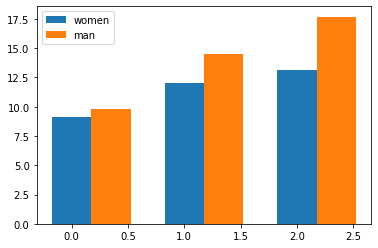

In [185]:
women18 = np.mean(salary['SNHMF1814'])
women26 = np.mean(salary['SNHMF2614'])
women50 = np.mean(salary['SNHMF5014'])

print(women18, women26, women50)

men18 = np.mean(salary['SNHMH1814'])
men26 = np.mean(salary['SNHMH2614'])
men50 = np.mean(salary['SNHMH5014'])

print(men18, men26, men50)

X = np.arange(3)

plt.bar(X, [women18, women26, women50], 0.35, label="women")
plt.bar(X+0.35, [men18, men26, men50], 0.35, label='man')
plt.legend()
plt.show()

In [186]:
population = pd.read_csv('population.csv')

# NIVGEO : geographic level (arrondissement, communes…)
# CODGEO : unique code for the town
# LIBGEO : name of the town
# MOCO : cohabitation mode :
# 11 = children living with two parents
# 12 = children living with one parent
# 21 = adults living in couple without child
# 22 = adults living in couple with children
# 23 = adults living alone with children
# 31 = persons not from family living in the home
# 32 = persons living alone
# AGE80_17 : age category (slice of 5 years) | ex : 0 -> people between 0 and 4 years old
# SEXE : sex, 1 for men | 2 for women
# NB : Number of people in the category

population = population[population["CODGEO"].apply(lambda x: str(x).isdigit())]

population["CODGEO"] = population["CODGEO"].astype(int)

population

/home/mykoa/anaconda3/envs/nets/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20
...,...,...,...,...,...,...,...
8536579,COM,97424,Cilaos,32,70,2,34
8536580,COM,97424,Cilaos,32,75,1,8
8536581,COM,97424,Cilaos,32,75,2,42
8536582,COM,97424,Cilaos,32,80,1,0


In [187]:
new_population = population.groupby(['CODGEO']).sum()

new_population

,MOCO,AGEQ80_17,SEXE,NB
CODGEO,,,,
1001,5168,9520,357,765
1002,5168,9520,357,227
1004,5168,9520,357,13460
1005,5168,9520,357,1595
1006,5168,9520,357,84
...,...,...,...,...
97420,5168,9520,357,22235
97421,5168,9520,357,7122
97422,5168,9520,357,76330


Questions:
- what are well-paid regions in France
- what is the most developed region
- what regions of Ile-de-France and districts of Paris are best-payed
- what is the payment among regions, professions and genders?
- how average salary correlates with number of firms and population size
- what is the best place for specific work group
- how is industry developed in France? what is the most developed?
- what is the most equal payed city between genders


- P.S. Regression of salary on profession, population size, firm number, gender

In [188]:
#what are well-paid regions in France

print(type(salary), type(name))

total = salary.merge(name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))
total

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,department_name,perfecture,constituency_number,common_name,postcodes,code_insee,latitude,longitude,remoteness,distance
0,1004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,Ain,Bourg-en-Bresse,2,Ambérieu-en-Bugey,01500,1004,45.950000,5.350000,0.80,395.804017
1,1007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,Ain,Bourg-en-Bresse,2,Ambronay,01500,1007,46.000000,5.350000,1.34,391.201041
2,1014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,Ain,Bourg-en-Bresse,2,Arbent,01100,1014,46.300000,5.683333,1.39,380.166378
3,1024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21,357.279466
4,1025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,Ain,Bourg-en-Bresse,4,Bâgé-la-Ville,01380,1025,46.316667,4.950000,1.41,344.776520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,95612,Le Thillay,13.7,22.1,16.0,11.3,11.9,12.8,20.2,14.5,...,Val-d'Oise,Cergy,9,Le Thillay,95500,95612,49.000000,2.466667,1.52,17.738999
4685,95637,Vauréal,16.3,25.3,15.4,11.7,12.2,14.1,21.7,14.7,...,Val-d'Oise,Cergy,2,Vauréal,95490,95637,49.033333,2.033333,0.84,28.694403
4686,95641,Vémars,16.3,24.7,16.5,12.3,12.5,14.9,21.4,15.6,...,Val-d'Oise,Cergy,9,Vémars,95470,95641,49.066667,2.566667,2.00,28.012513
4687,95652,Viarmes,16.7,26.9,16.0,12.0,12.3,14.7,23.6,15.1,...,Val-d'Oise,Cergy,7,Viarmes,95270,95652,49.133333,2.366667,1.15,29.751450


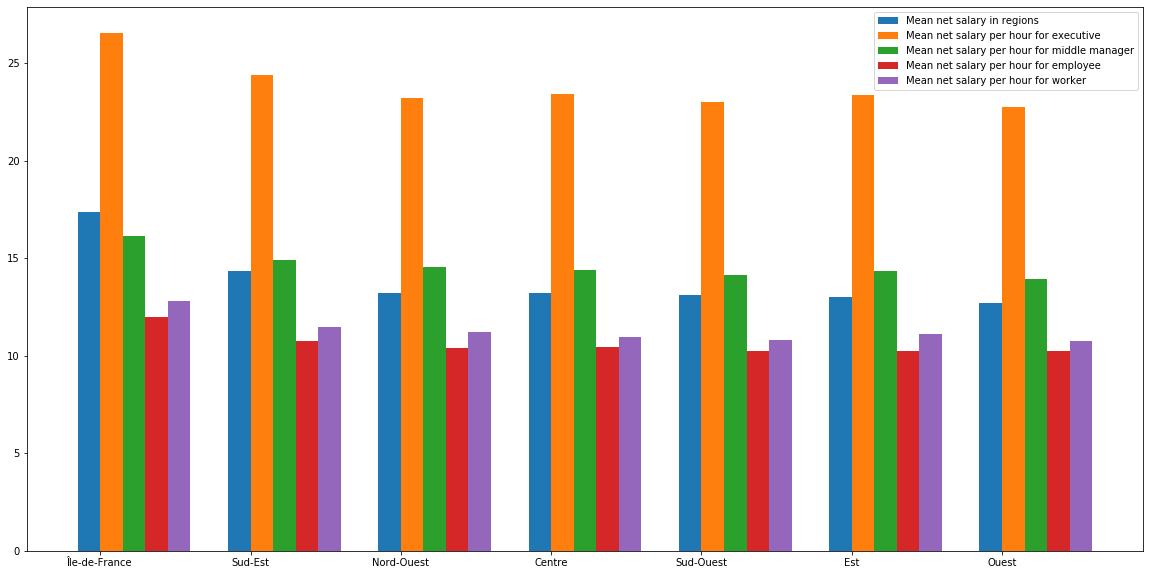

In [189]:
total = salary.merge(name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['EU_circo']).mean()

res = res.sort_values('SNHM14', ascending=False)

index, results = res.index.values, res['SNHM14'].values


width = 0.15
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])
# SNHMC14 : mean net salary per hour for executive
# SNHMP14 : mean net salary per hour for middle manager
# SNHME14 : mean net salary per hour for employee
# SNHMO14 : mean net salary per hour for worker
plt.bar(ind[:10], results[:10], width=width, label="Mean net salary in regions")
plt.bar(ind[:10]+width, res['SNHMC14'].values[:10], width=width, label='Mean net salary per hour for executive')
plt.bar(ind[:10]+width*2, res['SNHMP14'].values[:10], width=width, label='Mean net salary per hour for middle manager')
plt.bar(ind[:10]+width*3, res['SNHME14'].values[:10], width=width, label='Mean net salary per hour for employee')
plt.bar(ind[:10]+width*4, res['SNHMO14'].values[:10], width=width, label='Mean net salary per hour for worker')

plt.xticks(ind + width / 2, index)
plt.legend(loc='best')

<BarContainer object of 10 artists>

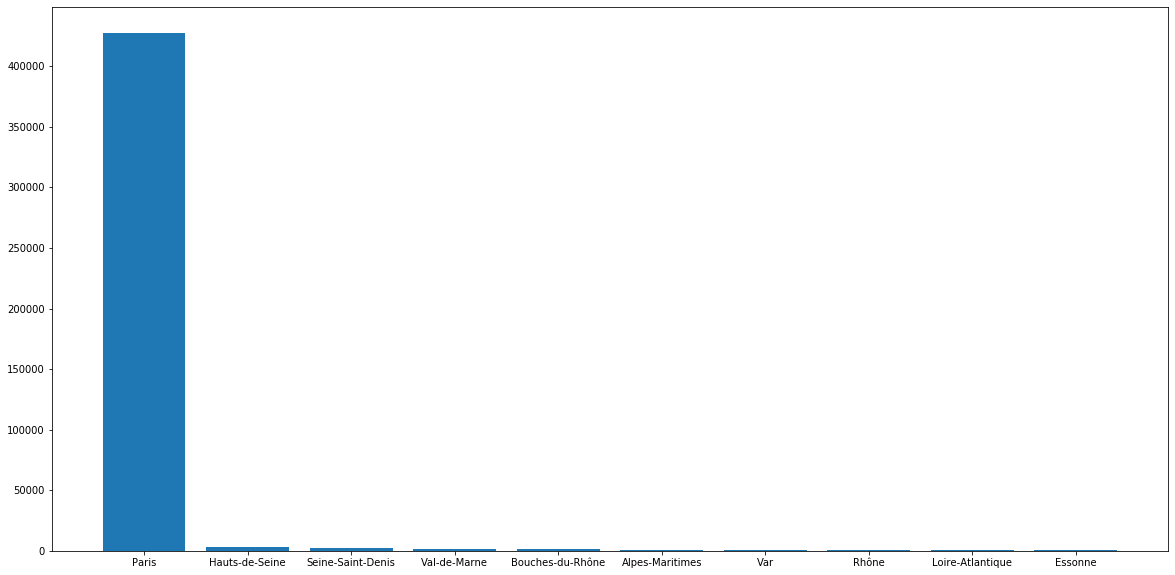

In [190]:
total = base.merge(name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['department_name']).mean()

res = res.sort_values('E14TST', ascending=False)

index, results = res.index.values, res['E14TST'].values

plt.figure(figsize=(20,10))

plt.bar(index[:10], results[:10], label="Mean net salary in regions")

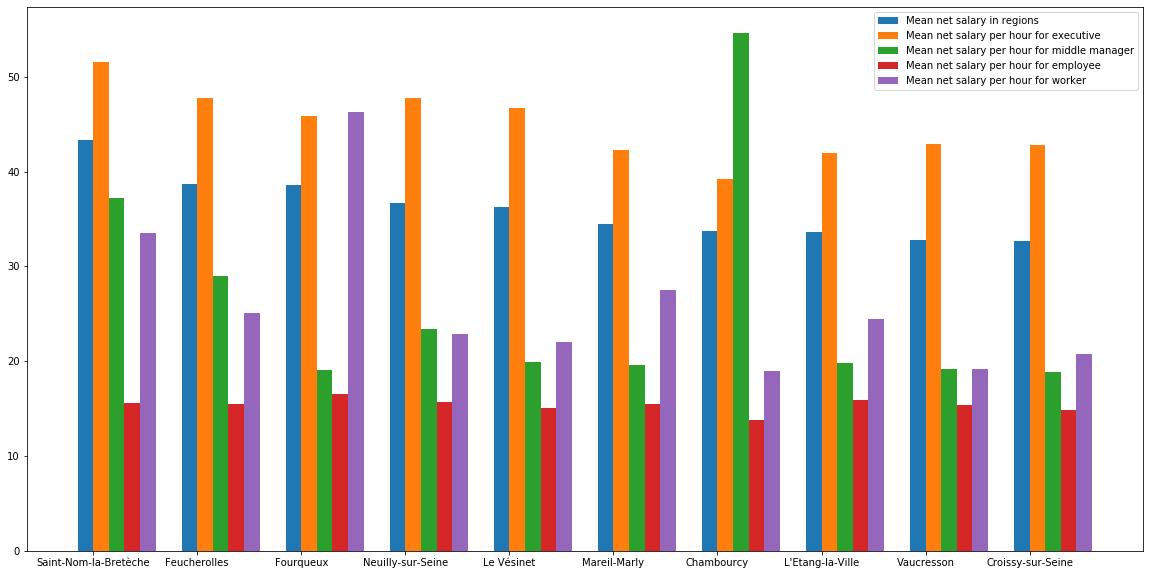

In [191]:
new_name = name[name['EU_circo'] == 'Île-de-France']

total = salary.merge(new_name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

# res = total.groupby(['department_name']).mean()

res = total.sort_values('SNHM14', ascending=False)


index, results = res['common_name'], res['SNHM14'].values


width = 0.15
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])

plt.bar(ind[:10], results[:10], width=width, label="Mean net salary in regions")
plt.bar(ind[:10]+width, res['SNHMC14'].values[:10], width=width, label='Mean net salary per hour for executive')
plt.bar(ind[:10]+width*2, res['SNHMP14'].values[:10], width=width, label='Mean net salary per hour for middle manager')
plt.bar(ind[:10]+width*3, res['SNHME14'].values[:10], width=width, label='Mean net salary per hour for employee')
plt.bar(ind[:10]+width*4, res['SNHMO14'].values[:10], width=width, label='Mean net salary per hour for worker')

plt.xticks(ind[:10] + width / 2, index[:10])
plt.legend(loc='best')

department_name
Seine-Saint-Denis        0.082747
Creuse                   0.087607
Lozère                   0.118136
Deux-Sèvres              0.118167
Dordogne                 0.120114
                           ...   
Moselle                  0.228449
Bouches-du-Rhône         0.232002
Territoire de Belfort    0.232852
Rhône                    0.243213
Yvelines                 0.280603
Name: equality, Length: 94, dtype: float64


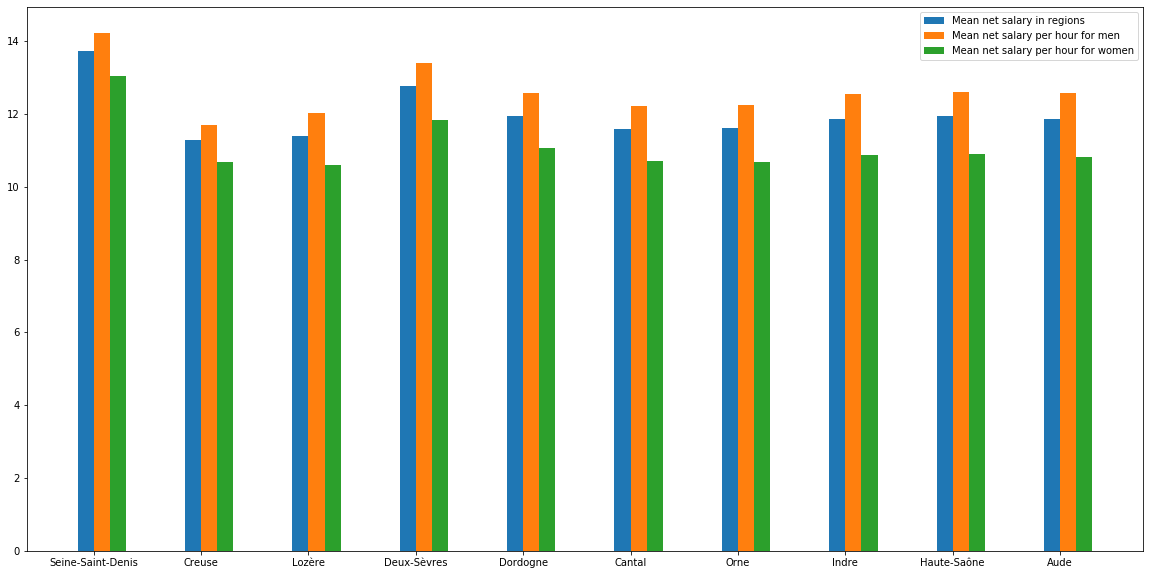

In [205]:
# SNHMF14

total = salary.merge(name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['department_name']).mean()

res['equality'] = 1 - res['SNHMF14'].values/res['SNHMH14'].values

res = res.sort_values('equality', ascending=True)

print(res['equality'])

index, results = res.index.values, res['SNHM14'].values


width = 0.15
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])

plt.bar(ind[:10], results[:10], width=width, label="Mean net salary in regions")
plt.bar(ind[:10]+width, res['SNHMH14'].values[:10], width=width, label='Mean net salary per hour for men')
plt.bar(ind[:10]+width*2, res['SNHMF14'].values[:10], width=width, label='Mean net salary per hour for women')


plt.xticks(ind[:10] + width / 2, index[:10])
plt.legend(loc='best')

<BarContainer object of 10 artists>

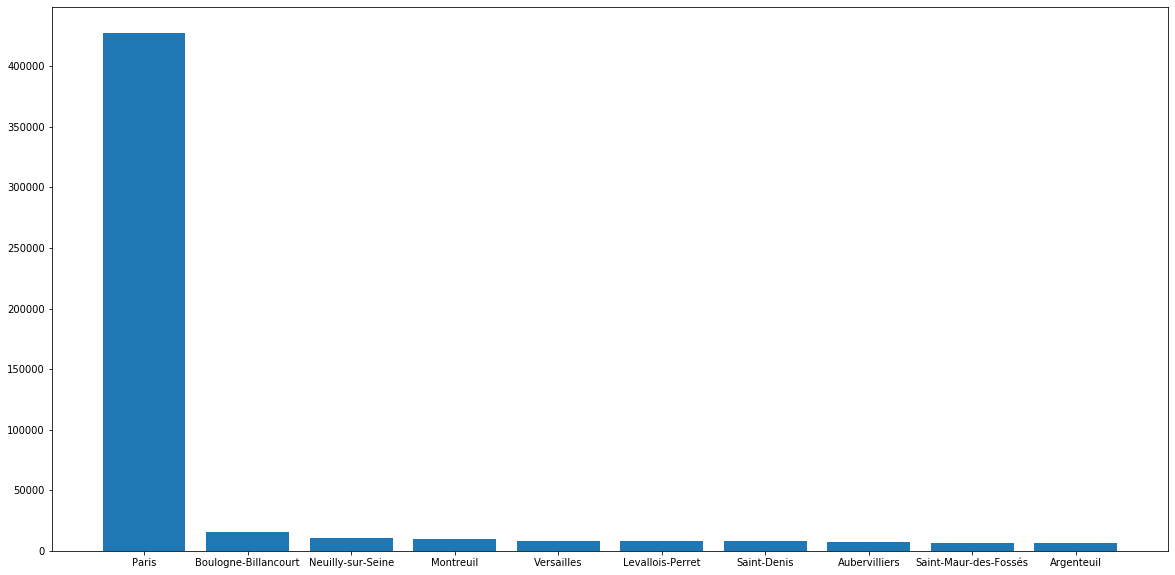

In [192]:
new_name = name[name['EU_circo'] == 'Île-de-France']

total = base.merge(new_name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

# res = total.groupby(['department_name']).mean()


res = total.sort_values('E14TST', ascending=False)

index, results = res['common_name'], res['E14TST'].values


plt.figure(figsize=(20,10))

plt.bar(index[:10], results[:10], label="Mean net salary in regions")

Index(['CODGEO', 'LIBGEO_left', 'SNHM14', 'distance', 'REG', 'DEP', 'E14TST',
       'E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50',
       'E14TS100', 'E14TS200', 'E14TS500', 'MOCO', 'AGEQ80_17', 'SEXE', 'NB'],
      dtype='object')


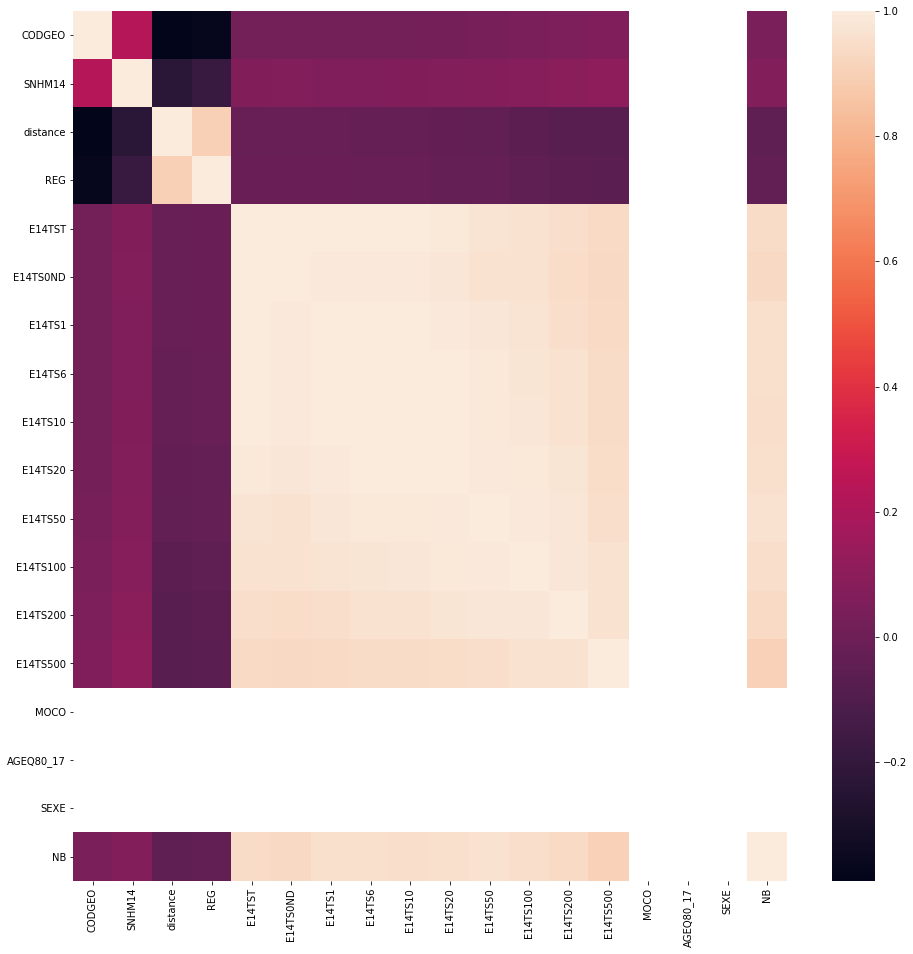

In [194]:
total = salary.merge(name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

total = total.merge(base, left_on='CODGEO', right_on='CODGEO',
          suffixes=('_left', '_right'))


total = total.merge(new_population, left_on='CODGEO', right_on='CODGEO',
          suffixes=('_left', '_right'))

total.drop([
        'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 
        'EU_circo', 'region_code',
       'region_name', 'region_capital', 'department_number', 'department_name',
       'perfecture', 'constituency_number', 'common_name', 'postcodes',
       'code_insee', 'latitude', 'longitude', 'remoteness', 'LIBGEO_right',
#        'REG', 'DEP', 'E14TS0ND', 'E14TS1',
#        'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
#        'E14TS500',
           ], axis=1, inplace=True)

print(total.columns)

corr = total.corr()

import seaborn as sns

plt.figure(figsize=(16, 16))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:



# plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)